# Project : DATA EXPLORATION AND ANALYSIS 


Hi, welcome to my notebook

Today we gonna be exploring and analyzing a DataSet that I have peak my intersted as it is related to Sleep and Characteristics that may or may not 
influence the quality of sleep. 

As sleep is a chore regulator of mood and energy, it's always interesting to dive into to component of what will give you a restfull night. 

It's a Data set that I have found on Kaggle, it contains 374 rows and 13 columns. Covering a wide range of variabes, such as Gender, Age, Occupation, Sleep Durationl, Quality of Sleep, Physical Activity Level, Stress Level, BMI, Blood Pressure, Heart rate, Daily Steps and Sleep Disorder. 

In [562]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [9]:
df_main = pd.read_csv(r'C:\Users\REBUILD\Downloads\Sleep_health_and_lifestyle_dataset.csv')

## Let's look at the dataset that we have to see if we have any missing values and what we're a gonna be working with 

In [27]:
df_main.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [254]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    object  
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    object  
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    int64   
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    int64   
 8   BMI Category             374 non-null    object  
 9   Blood Pressure           374 non-null    object  
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           155 non-null    object  
 13  Age Group                374 non-null    category
dtypes: categor

In [94]:
df_main.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Unfortunately the data set has already been cleaned

The only column containing missing values is Sleep Disorder as expect not every body has one, so there's no need to drop anything here

In [29]:
df_main.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Descriptive Analysis 

### 1.lets visualiuze what our data set looklike 

We can start by visualyzing the repartion by BMI, that would give good starting point, as BMI is a key indicator in someone's Health status.

In [59]:
df_main['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

It seems we have 'duplicate', 'Normal' and 'Normal Weigtht' are the same category but they are treated as spearate.

Probably due to wrong data entry. Let's correct that

In [64]:
df_main['BMI Category'] = df_main['BMI Category'].replace({'Normal Weight':'Normal'})
df_main['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [85]:
df_countBMI = df_main['BMI Category'].value_counts()
df_countBMI

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

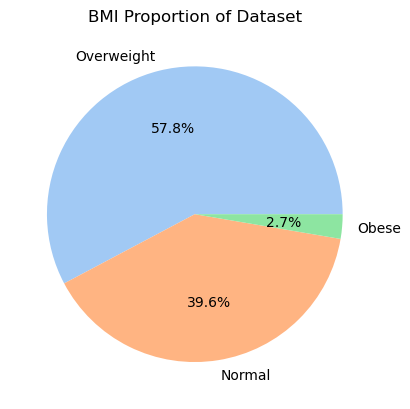

In [132]:
colors = sns.color_palette('pastel')[0:3]

plt.pie(df_countBMI, labels =df_main['BMI Category'].unique(), autopct='%1.1f%%', colors=colors)
plt.title('BMI Proportion of Dataset')
plt.show()
#addding the number on the pie chart 

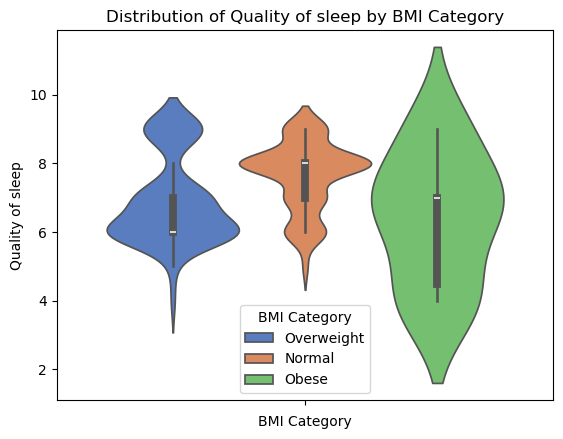

In [109]:

sns.violinplot(data=df_main, hue='BMI Category', y='Quality of Sleep', palette='muted', density_norm='count')
plt.title('Distribution of Quality of sleep by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Quality of sleep')
plt.show()

Observation : As we can see people above 'Normal BMI' have a lower Quality of Sleep. More than half of our data set are Overwieght

and the Obese portion is really small (2.7%)

### 2.Now lets see if there a significant difference between different age range in terms of sleep duration

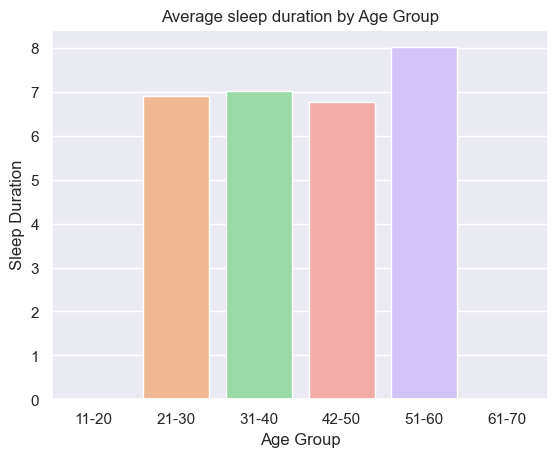

In [564]:
cut = [10,20,30,40,50,60,70]
labels =  ['11-20','21-30', '31-40','42-50','51-60','61-70']
df_main['Age Group']= pd.cut(df_main['Age'], bins=cut, labels=labels)


df_SleepbyAge = df_main.groupby('Age Group')['Sleep Duration'].mean().reset_index()
sns.barplot(data=df_SleepbyAge, x='Age Group', y='Sleep Duration', palette='pastel')
plt.title('Average sleep duration by Age Group')
plt.xlabel('Age Group')
plt.show()

Observation : In terms of Sleep duration, the average for each group is aroung 7 Hours of sleep. And around 8 hours for 51-60 years old range

We would have expect a lesser Sleep Duration for the younger range

### Lets see about the quality of sleep for the same group

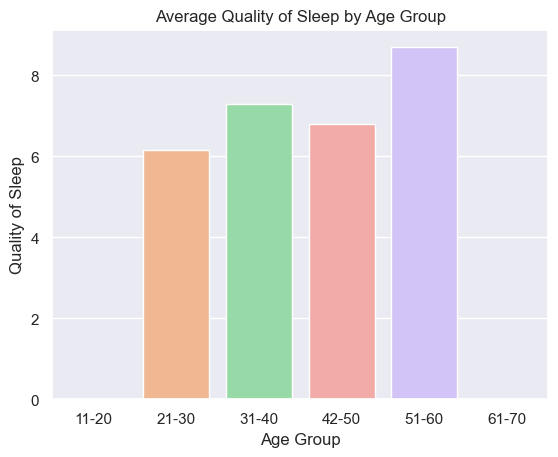

In [566]:

df_SleepbyAge = df_main.groupby('Age Group')['Quality of Sleep'].mean().reset_index()
sns.barplot(data=df_SleepbyAge, x='Age Group', y='Quality of Sleep', palette='pastel')
plt.title('Average Quality of Sleep by Age Group')
plt.xlabel('Age Group')
plt.show()

Observation: The groups who stand out are 31-40 and 51-60. In general this is the time where people settle and have a life routine implemented that allow
to correct the sleep schedule. 

Whereas in the tweenies and tend to not have it figure out maybe. 
(put the to 2 graphs side by side for better presentation)

### 3.Let's see the propotion of people with Sleep Disorder

In [246]:
Sleep_disorder = df_main['Sleep Disorder'].unique()
print(Sleep_disorder)

[nan 'Sleep Apnea' 'Insomnia']


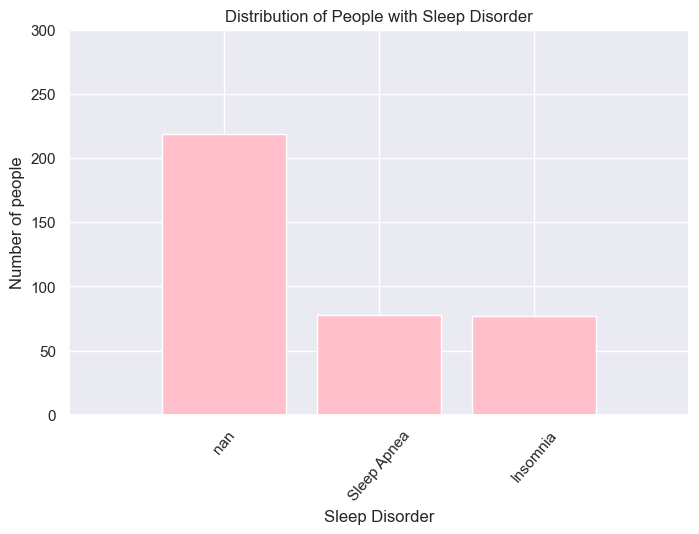

In [611]:
sleep_disorder_counts = df_main['Sleep Disorder'].value_counts(dropna=False)

sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
plt.bar(sleep_disorder_counts.index.astype(str), sleep_disorder_counts.values, color='pink')
plt.xlim(-1,3)
plt.ylim(0,300)
plt.title('Distribution of People with Sleep Disorder')
plt.ylabel('Number of people')
plt.xlabel('Sleep Disorder')
plt.xticks(rotation=50)
plt.show()

Our Dataset is mainly composed of people with no sleep disorder and we have an evenly distributed case of Sleep apnea and Insomnia.

To define, Sleep Apnea is when people stop breathing during their sleep, so they wake up during the night hich interrupt their sleep 

wich can lead to bad sleep score. 

### 4.In average people who sleep well, how many hours do they sleep ? 



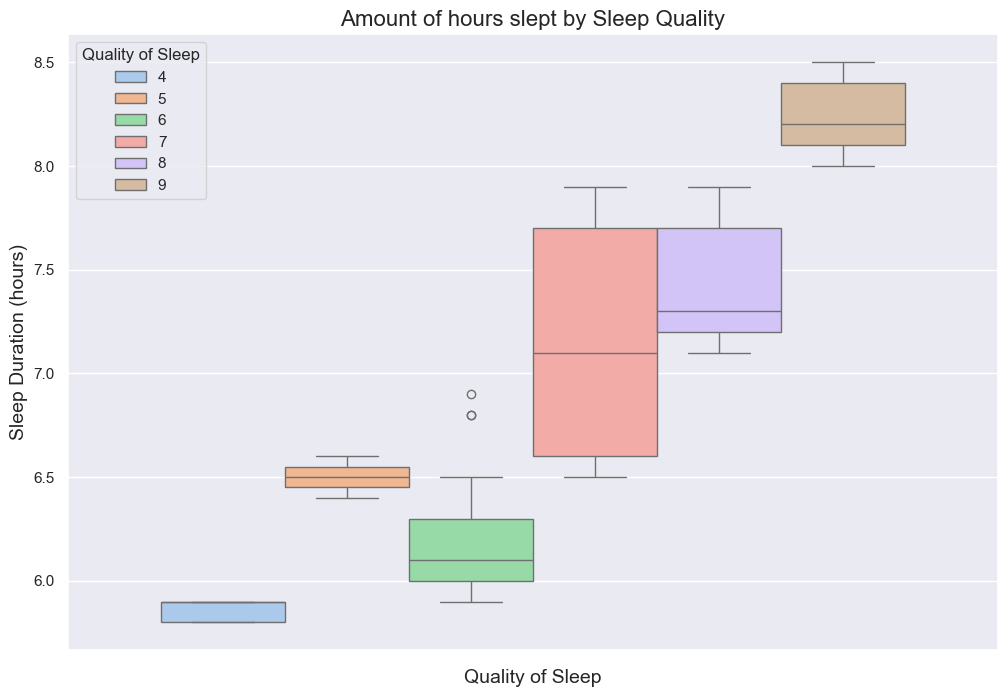

In [380]:
Quality_sleep = df_main[df_main['Quality of Sleep']>=8] 
plt.figure(figsize=(12,8))
sns.boxplot(data=df_main, hue='Quality of Sleep', y='Sleep Duration', palette='pastel')
plt.title('Amount of hours slept by Sleep Quality', fontsize=16)
plt.xlabel('Quality of Sleep', fontsize=14)
plt.ylabel('Sleep Duration (hours)', fontsize=14)
plt.show()

In [384]:
Quality_sleep = df_main[df_main['Quality of Sleep']>=8] 
Quality_sleep.groupby('Quality of Sleep')['Sleep Duration'].mean().reset_index()


,Quality of Sleep,Sleep Duration
0,8,7.403670
1,9,8.243662


Observation : In average people with a good quality sleep score sleep between 7 and 8 hours. We can see a trend of people who sleep more sleeps better.

### 5. We gonna see what Occupation has the best and the worst sleep quality

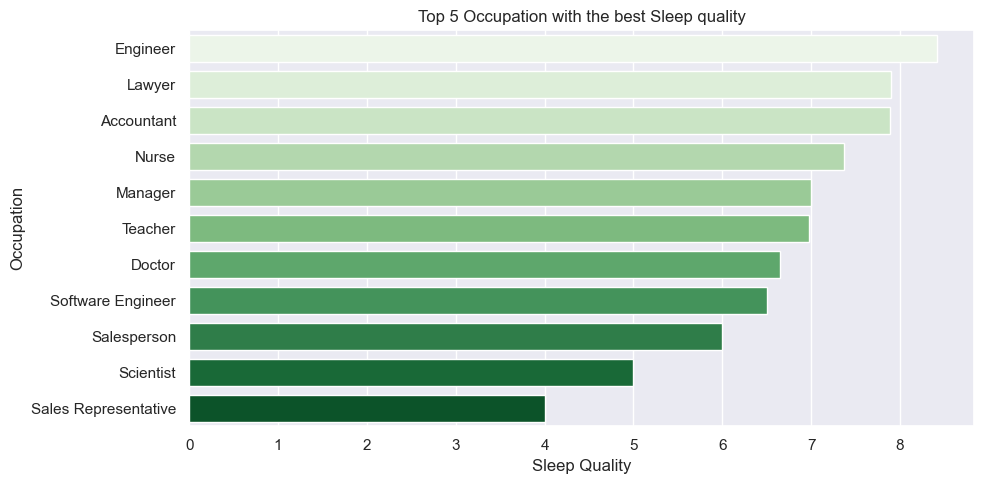

In [568]:
df_Quality_occ = df_main.groupby('Occupation')['Quality of Sleep'].mean().reset_index()

#data frame to target the best 
top_5_best = df_Quality_occ.sort_values(by='Quality of Sleep', ascending=False)


ax = plt.figure(figsize=(10,5))
#top 5 best 
sns.barplot(data=top_5_best, x='Quality of Sleep', y='Occupation', width=0.75, palette='Greens')
plt.title('Top 5 Occupation with the best Sleep quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()




Observation ; It appears that the best sleeper are the Engineers, Lawyer, Accountant, Nurse and Manager. It would be interesting to analyze it 
with revenue per occupation, work-life balance or with stress level to see how it correlate with sleep quality in these profession. 

It shows the importance of Occupation factors in the Quality of Sleep

# Relational Analysis 

It would interesting to investigiate a little bit more to find features influence more the quality of sleep 

So let's check that

### Quality of sleep 

So Im curious about the features that impact the quality of sleep let's see about that with the correlation coefficient; 

In [556]:
df_corr = df_main.corr(numeric_only=True)
df_corr

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


* I took the liberty of removing the column 'Person ID' as it is irrelevant

<Axes: >

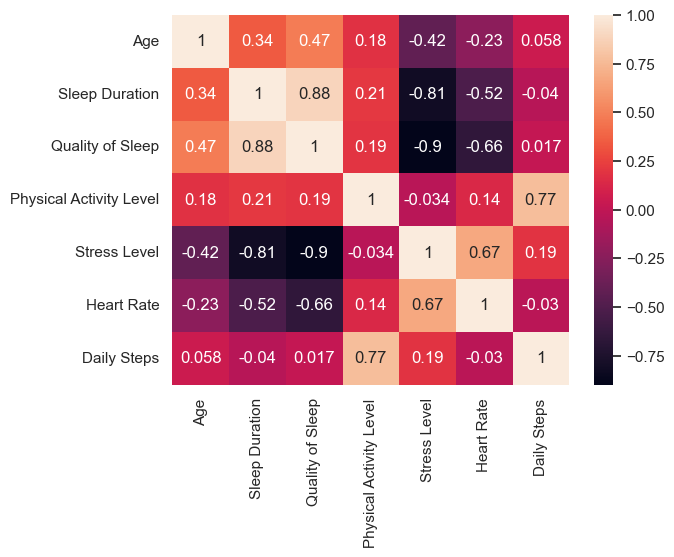

In [552]:
sns.heatmap(df_corr, annot=True)

In [501]:
from scipy.stats  import pearsonr

correlation_activity, p_value_activity = pearsonr(df_main['Physical Activity Level'], df_main['Quality of Sleep'])
correlation_stress, p_value_stress = pearsonr(df_main['Stress Level'], df_main['Quality of Sleep'])  

print(f'The correlation between Physical Activity Level and Quality of sleep is : {correlation_activity:.2f} (p={p_value_activity:.3f})')
print(f'The correlation between Stress Level and Quality of sleep is : {correlation_stress:.2f} (p={p_value_stress:.3f})')

The correlation between Physical Activity Level and Quality of sleep is : 0.19 (p=0.000)
The correlation between Stress Level and Quality of sleep is : -0.90 (p=0.000)


Observation : 
Correlation between Physical Activity and Quality of sleep is 0,19, which a weak sign but since the p-value is 0,
we cannot reject the Null Hypthesis. 
We can See that there is a Strong negative Correlation between Stress and Quality of Sleep, meaning the more you are stressed the less 
you sleep. 

Let's visualize it 

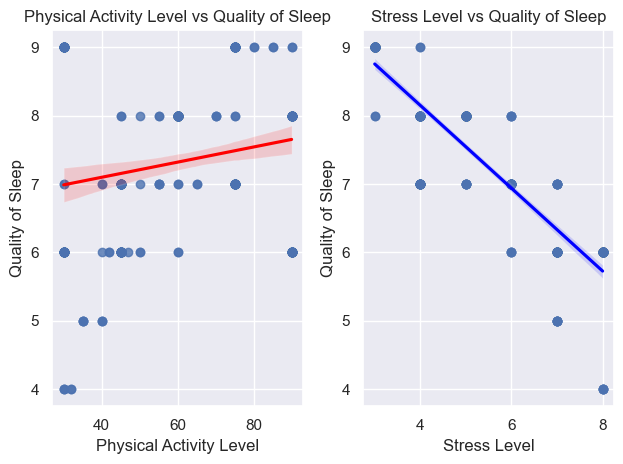

In [515]:
#first graph to show the correlation line between Activity Level and Quality of sleep 
plt.subplot(1,2,1)
sns.regplot(data=df_main, x='Physical Activity Level', y='Quality of Sleep', line_kws={'color':'red'})
plt.title('Physical Activity Level vs Quality of Sleep')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')

#second graph show the correlation line between Stress Level and Quality of sleep 
plt.subplot(1,2,2)
sns.regplot(data=df_main, x='Stress Level', y='Quality of Sleep', line_kws={'color':'blue'})
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

plt.tight_layout()
plt.show()

I want to see how those two varaibles, both impact the quality of sleep. 

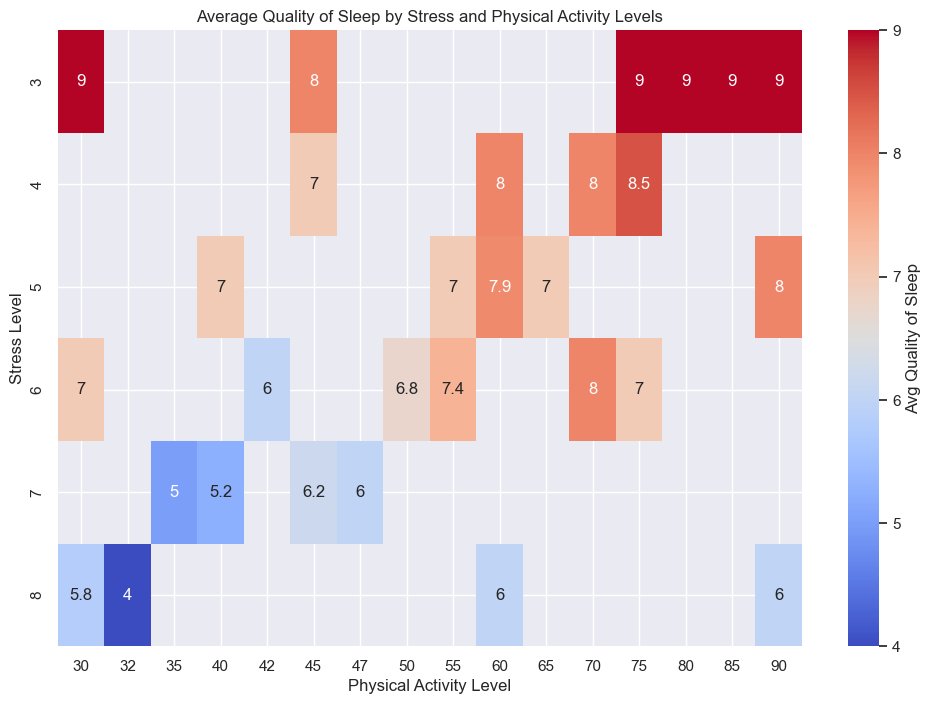

In [604]:
heatmap_data = df_main.groupby(['Stress Level', 'Physical Activity Level'])['Quality of Sleep'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, cbar_kws={'label': 'Avg Quality of Sleep'})
plt.title('Average Quality of Sleep by Stress and Physical Activity Levels')
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.show()

Although we have some outliers (People with low activity level and low stress level) the majority of the values tend to show relation 
between a high activity level, low stress and a higheer average quality of sleep

### Lets see how those features reflect the duration of sleep 

I believe those are the features whom would impact more the duration of sleep

### Duration of Sleep

In [522]:
correlation_activity_duration , p_value_activity_duration = pearsonr(df_main['Physical Activity Level'], df_main['Sleep Duration'])
correlation_stress_duration, p_value_stress_duration = pearsonr(df_main['Stress Level'], df_main['Sleep Duration'])  

print(f'The correlation between Physical Activity Level and Sleep Duration is : {correlation_activity_duration:.2f} (p={p_value_activity_duration:.3f})')
print(f'The correlation between Stress Level and Sleep Duration is : {correlation_stress_duration:.2f} (p={p_value_stress_duration:.3f})')

The correlation between Physical Activity Level and Sleep Duration is : 0.21 (p=0.000)
The correlation between Stress Level and Sleep Duration is : -0.81 (p=0.000)


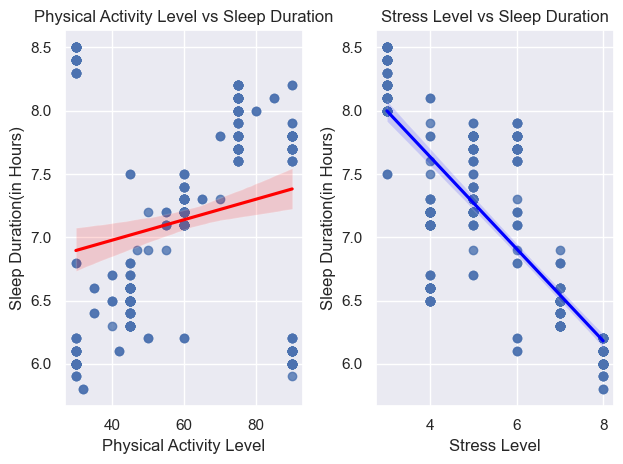

In [559]:
plt.subplot(1,2,1)
sns.regplot(data=df_main, x='Physical Activity Level', y='Sleep Duration', line_kws={'color':'red'})
plt.title('Physical Activity Level vs Sleep Duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration(in Hours)')

#second graph show the correlation line between Stress Level and Quality of sleep 
plt.subplot(1,2,2)
sns.regplot(data=df_main, x='Stress Level', y='Sleep Duration', line_kws={'color':'blue'})
plt.title('Stress Level vs Sleep Duration')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration(in Hours)')

plt.tight_layout()
plt.show()

Observation : Can't reject Null Hypothesis, there's a slight relation between Activity level and Duration of sleep, but an even greater one with Stress Level, we can conclude that Stress Level is a impactful feature in Duration of sleep. 

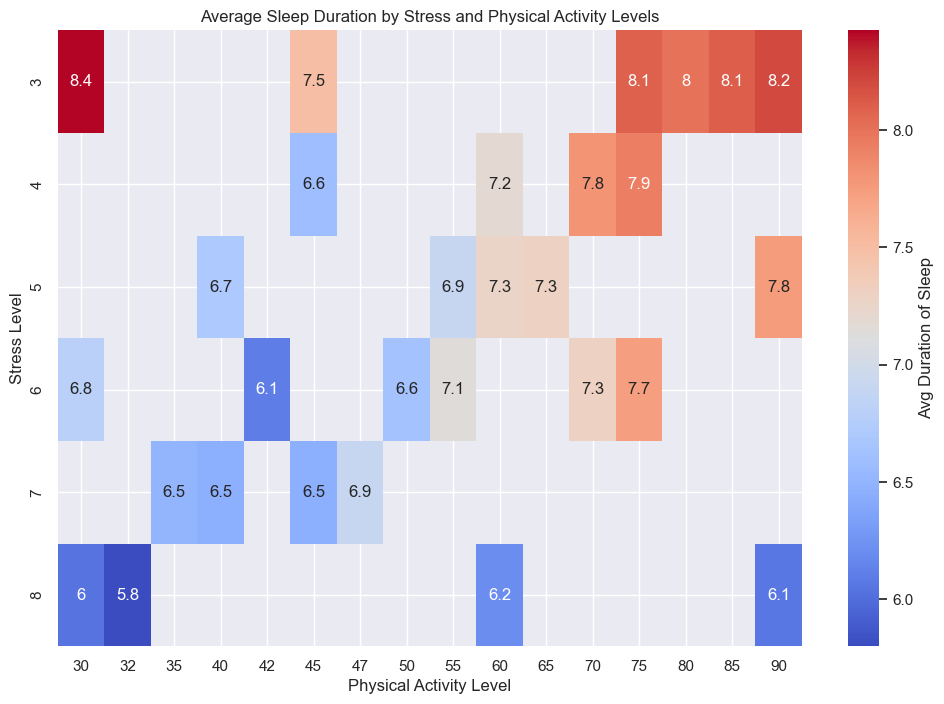

In [602]:
heatmap_data2 = df_main.groupby(['Stress Level', 'Physical Activity Level'])['Sleep Duration'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data2, cmap="coolwarm", annot=True, cbar_kws={'label': 'Avg Duration of Sleep'})
plt.title('Average Sleep Duration by Stress and Physical Activity Levels')
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.show()

Observation : The stress level has a stronger impact on sleep duration than the Level of Physical Activity. 
Nonetheless, a moderate Physical Acvitity level seems to mitigate the impact of stress in sleep duration.

### Heart-rate 

I notice in the heatmap, a significant coefficient between 'Heart Rate' and 'Sleep Duration'/'Quality of Sleep'

In [576]:
correlation_Heart_duration , p_value_Heart_duration = pearsonr(df_main['Heart Rate'], df_main['Sleep Duration'])
correlation_Heart_quality, p_value_Heart_quality = pearsonr(df_main['Heart Rate'], df_main['Quality of Sleep'])  

print(f'The correlation between Heart Rate and Sleep Duration is : {correlation_Heart_duration:.2f} (p={p_value_activity_duration:.3f})')
print(f'The correlation between Heart Rate and Sleep Duration is : {correlation_Heart_quality:.2f} (p={p_value_stress_duration:.3f})')

The correlation between Heart Rate and Sleep Duration is : -0.52 (p=0.000)
The correlation between Heart Rate and Sleep Duration is : -0.66 (p=0.000)


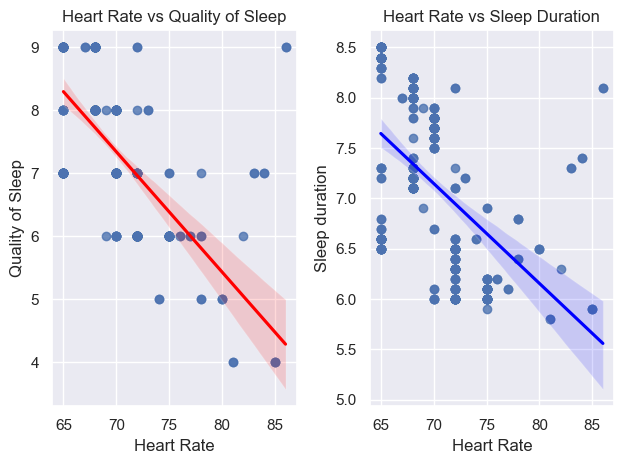

In [570]:
plt.subplot(1,2,1)
sns.regplot(data=df_main, x='Heart Rate', y='Quality of Sleep', line_kws={'color':'red'})
plt.title('Heart Rate vs Quality of Sleep')
plt.xlabel('Heart Rate')
plt.ylabel('Quality of Sleep')

#second graph show the correlation line between Stress Level and Quality of sleep 
plt.subplot(1,2,2)
sns.regplot(data=df_main, x='Heart Rate', y='Sleep Duration', line_kws={'color':'blue'})
plt.title('Heart Rate vs Sleep Duration')
plt.xlabel('Heart Rate')
plt.ylabel('Sleep duration')

plt.tight_layout()
plt.show()

Observation : The correlation between Heart Rate and Sleep Duration is -0.52 (p=0.000), indicating a moderate negative relationship. This suggests that individuals with higher heart rates tend to sleep for shorter durations, although the relationship is not exceptionally strong.

The correlation between Heart Rate and Quality of Sleep is -0.66 (p=0.000), showing a stronger negative relationship. This implies that higher heart rates are more strongly associated with poorer sleep quality compared to sleep duration.

Overall, these results highlight that heart rate plays a significant role in both the quantity and quality of sleep, with a greater impact observed on sleep quality. Managing factors that influence heart rate, such as stress or physical activity, could potentially improve sleep outcomes.


# Conclusion 

Through this exploratory data analysis, we were able to identify several factors influencing sleep quality and duration, including stress levels and physical activity.

Impact of stress: Stress is the most significant factor affecting sleep quality. Our results show that higher levels of stress are systematically associated with reduced sleep duration, regardless of the intensity of physical activity. This suggests that stress management could be an important lever for improving sleep quality.

Role of physical activity: Although moderate physical activity appears to have a beneficial effect on sleep, its impact is less than that of stress. Indeed, even high levels of physical activity fail to compensate for excessive stress, and this is true for the majority of individuals.

Complementary variables: Variables such as age, gender and type of occupation were not directly explored in this analysis, but could offer interesting insights into the factors influencing sleep.


Another variable that could have been interesting to implement on the dataset would be time, as it could provide insights into how sleep patterns vary across different times of day, seasons. By incorporating time-related variables, we could better understand trends and fluctuations in sleep duration and quality over time, potentially revealing patterns linked to work schedules, weekends, or seasonal changes.

In short, to improve sleep quality, it would be relevant to target stress reduction strategies while encouraging regular but moderate physical activity. The results of this analysis highlight that stress management could be the key to better sleep quality in the long term.

